In [14]:
import pandas as pd
import numpy as np
import operator
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter

import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
IPythonConsole.ipython_useSVG=True




In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error
from rdkit import Chem
import pandas as pd
import numpy as np

In [16]:
np.random.seed(148260)

In [17]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/mateugazi/czasteczkowa-inzynierka/main/data/processed/smiles_aggregated.csv'
    )

In [18]:
df.head()

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5


In [19]:
df.columns

Index(['mol', 'CID', 'Class', 'Model', 'pIC50', 'MW', 'AlogP', 'HBA', 'HBD',
       'RB',
       ...
       'PEOE6 (PEOE6)', 'PEOE7 (PEOE7)', 'PEOE8 (PEOE8)', 'PEOE9 (PEOE9)',
       'PEOE10 (PEOE10)', 'PEOE11 (PEOE11)', 'PEOE12 (PEOE12)',
       'PEOE13 (PEOE13)', 'PEOE14 (PEOE14)', 'canvasUID'],
      dtype='object', length=595)

In [20]:
df['mol_from_smiles'] = df['mol'].apply(Chem.MolFromSmiles)

In [21]:
df.head()

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,mol_from_smiles
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1,<rdkit.Chem.rdchem.Mol object at 0x000002A2F08...
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2,<rdkit.Chem.rdchem.Mol object at 0x000002A2F06...
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3,<rdkit.Chem.rdchem.Mol object at 0x000002A2F06...
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4,<rdkit.Chem.rdchem.Mol object at 0x000002A2F06...
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5,<rdkit.Chem.rdchem.Mol object at 0x000002A2F06...


In [22]:
from mordred import Calculator, descriptors

In [23]:
calc = Calculator(descriptors, ignore_3D=True)

In [24]:
print(f'First 10 out of {len(calc.descriptors)} descriptors')
calc.descriptors[:10]

First 10 out of 1613 descriptors


(mordred.ABCIndex.ABCIndex(),
 mordred.ABCIndex.ABCGGIndex(),
 mordred.AcidBase.AcidicGroupCount(),
 mordred.AcidBase.BasicGroupCount(),
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'),
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpMax'),
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpDiam'),
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpAD'),
 mordred.AdjacencyMatrix.AdjacencyMatrix('SpMAD'),
 mordred.AdjacencyMatrix.AdjacencyMatrix('LogEE'))

In [25]:
desc = calc.pandas(df['mol_from_smiles'], nproc=1)

c:\Users\wojci\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [26]:
print(f'Computed {len(desc.columns)} descriptors for {len(desc)} molecules')

Computed 1613 descriptors for 1519 molecules


# Feature selection

In [27]:
desc.shape

(1519, 1613)

In [28]:
for c in desc.columns:
    desc[c] = pd.to_numeric(desc[c], errors='coerce')

In [29]:
zero_variation = []

for c, s in desc.std().items():
    try:
        if s == 0:
            zero_variation.append(c)
    except Exception as e:
        # Handle the exception or print the error message for debugging
        print(f"Error processing descriptor {c}: {e}")

# Now zero_variation should contain descriptors with zero standard deviation
print(zero_variation)


['nB', 'nP', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB', 'NddC', 'NssssN', 'NsSiH3', 'NssSiH2', 'NsssSiH', 'NssssSi', 'NsPH2', 'NssPH', 'NsssP', 'NdsssP', 'NsssssP', 'NsSH', 'NdS', 'NsGeH3', 'NssGeH2', 'NsssGeH', 'NssssGe', 'NsAsH2', 'NssAsH', 'NsssAs', 'NsssdAs', 'NsssssAs', 'NsSeH', 'NdSe', 'NssSe', 'NaaSe', 'NdssSe', 'NddssSe', 'NsSnH3', 'NssSnH2', 'NsssSnH', 'NssssSn', 'NsPbH3', 'NssPbH2', 'NsssPbH', 'NssssPb', 'SsLi', 'SssBe', 'SssssBe', 'SssBH', 'SsssB', 'SssssB', 'SddC', 'SssssN', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SdsssP', 'SsssssP', 'SsSH', 'SdS', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe', 'SsAsH2', 'SssAsH', 'SsssAs', 'SsssdAs', 'SsssssAs', 'SsSeH', 'SdSe', 'SssSe', 'SaaSe', 'SdssSe', 'SddssSe', 'SsSnH3', 'SssSnH2', 'SsssSnH', 'SssssSn', 'SsPbH3', 'SssPbH2', 'SsssPbH', 'SssssPb', 'ETA_dPsi_B', 'SMR_VSA8', 'SlogP_VSA9', 'n9Ring', 'n10Ring', 'n11Ring', 'n12Ring', 'n3HRing', 'n9HRing', 'n10HRing', 'n11HRing', 'n12HRing', 'n3aRing',

In [30]:
desc.drop(columns=zero_variation, inplace=True)
print(f'New shape: {desc.shape}')

New shape: (1519, 1460)


In [31]:
for c in desc.columns:
    desc[c] = pd.to_numeric(desc[c], errors='coerce')

In [32]:
missing_values = desc.isnull().any()
print(f'Found {missing_values.sum()} columns with missing values')

Found 236 columns with missing values


In [33]:
desc = desc.loc[:, ~missing_values]
print(f'New shape: {desc.shape}')

New shape: (1519, 1224)


In [34]:
scaler = StandardScaler()
feats = scaler.fit_transform(desc)

In [35]:
scaler.mean_[:8], scaler.scale_[:8]

(array([2.65785485e+01, 2.09242695e+01, 3.22580645e-02, 1.50032916e+00,
        4.31764754e+01, 2.50269939e+00, 4.94825921e+00, 4.31764754e+01]),
 array([ 6.40797356,  4.68541029,  0.23434437,  1.03961995, 10.35527973,
         0.07811054,  0.13119759, 10.35527973]))

In [36]:
cross_corr = np.corrcoef(feats.T)

In [37]:
pca = PCA()

pca.n_components = 16
pca_feats = pca.fit_transform(feats)

In [38]:
cross_corr = np.corrcoef(pca_feats.T)
print(f'The largest correlation between feature 0 and all others is {max(cross_corr[0, 1:]):.2e}')

The largest correlation between feature 0 and all others is 3.98e-17


In [39]:
feat_score = [np.corrcoef(df['Class'], f)[0][1] for f in pca_feats.T]

Text(0.5, 0, 'Feature ID')

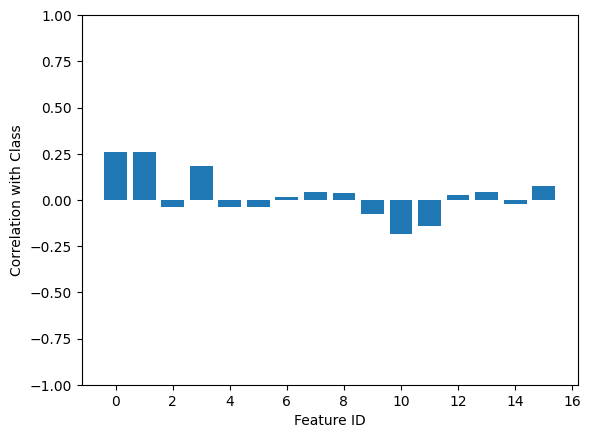

In [40]:
fig, ax = plt.subplots()

ax.bar(range(len(feat_score)), feat_score)

ax.set_ylim(-1, 1)
ax.set_ylabel(f'Correlation with Class')
ax.set_xlabel('Feature ID')

In [41]:
lasso = LassoCV().fit(pca_feats, df['Class'])

Text(0.5, 0, 'Feature ID')

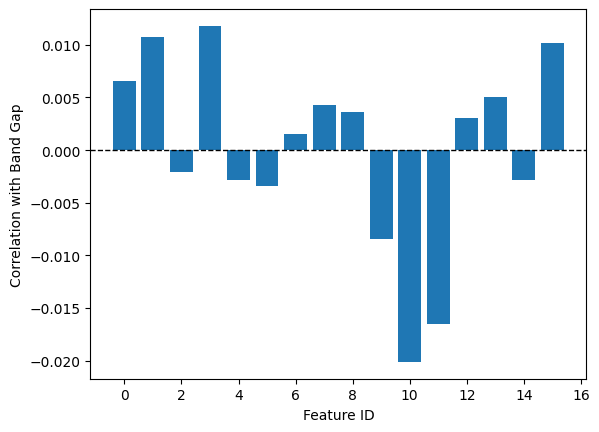

In [42]:
fig, ax = plt.subplots()

ax.bar(range(len(feat_score)), lasso.coef_)
ax.set_xlim(ax.get_xlim())
ax.plot(ax.get_xlim(), [0, 0], 'k--', lw=1.)

ax.set_ylabel(f'Correlation with Band Gap')
ax.set_xlabel('Feature ID')

In [43]:
train_data, test_data, train_desc, test_desc = train_test_split(df, desc, test_size=0.1)

In [44]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=16)),
    ('lasso', LassoCV())
])

In [45]:
test_data = test_data.copy()
test_data['16-ncomp-model'] = model.fit(train_desc, train_data['Class']).predict(test_desc)

In [46]:
model.set_params(pca__n_components=8)  # Notation is [step name]__[parameter name]
test_data['8-ncomp-model'] = model.fit(train_desc, train_data['Class']).predict(test_desc)

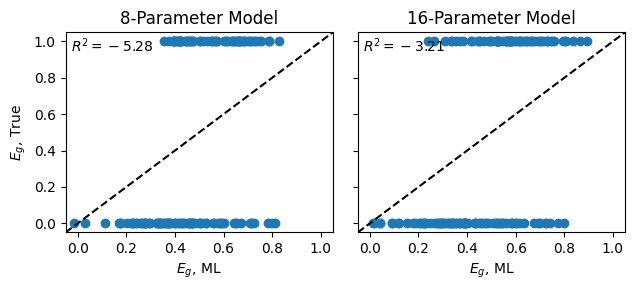

In [47]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6.5, 3.))

# Plot both models
for ax, col in zip(axs, ['8-ncomp-model', '16-ncomp-model']):
    ax.set_title(f'{col.split("-")[0]}-Parameter Model')
    r2 = r2_score(test_data[col], test_data['Class'])
    ax.text(0.02, 0.9, f'$R^2 = {r2:.2f}$', transform=ax.transAxes)
    ax.scatter(test_data[col], test_data['Class'])

# Make it look nicer
for ax in axs:
    ax.set_xlabel('$E_g$, ML')
    
    ax.set_ylim(ax.get_ylim())
    ax.set_xlim(ax.get_ylim())
    ax.plot(ax.get_xlim(), ax.get_xlim(), 'k--')
    
axs[0].set_ylabel('$E_g$, True')
fig.tight_layout()

In [48]:
X = desc
y = df['Class']

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from flaml import AutoML

In [52]:
imputer = SimpleImputer(strategy="median")
scaler = RobustScaler()
imputer.fit(X)
X = imputer.transform(X)
scaler.fit(X)
X = scaler.transform(X)

In [53]:
y_series = pd.Series(y)

X = pd.DataFrame(X)

correlations = X.corrwith(y_series)

correlations = X.corrwith(y)

sorted_correlations = correlations.abs().sort_values(ascending=False)

top_50_features = sorted_correlations.index[:50]

selected_features_df = X[top_50_features]

In [54]:
X.shape

(1519, 1224)

In [55]:
X = selected_features_df

In [56]:
X.shape

(1519, 50)

In [57]:
y.shape

(1519,)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [59]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np


def morganfp(fname, radius=2, nBits=1024):
    accepted_file_formats = ['sdf', 'mol']
    if fname.split('.')[-1] not in accepted_file_formats:
        raise NotImplementedError(
            'file type \'{}\'  is unsupported. Accepted formats: {}.'.format(fname.split('.')[-1], accepted_file_formats))
    mol = Chem.MolFromMolFile(fname)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)

    return np.array(list(fp))

In [60]:
fpgen = AllChem.GetMorganGenerator(radius=2)
fp = []
for mol in df['mol_from_smiles']:
    fp.append(np.array(fpgen.GetFingerprint(mol,customAtomInvariants=[1]*mol.GetNumAtoms())))
df['MorganFP'] = fp

In [61]:
X = df['MorganFP']

In [62]:
# Split the list column into separate columns
df_2 = pd.DataFrame(X.tolist(), columns=[f'MorganFP_{i}' for i in range(len(X.iloc[0]))])
df_2

,MorganFP_0,MorganFP_1,MorganFP_2,MorganFP_3,MorganFP_4,MorganFP_5,MorganFP_6,MorganFP_7,MorganFP_8,MorganFP_9,...,MorganFP_2038,MorganFP_2039,MorganFP_2040,MorganFP_2041,MorganFP_2042,MorganFP_2043,MorganFP_2044,MorganFP_2045,MorganFP_2046,MorganFP_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1516,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X = df_2

In [64]:
y = df['Class']

### Neural Network

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#print(X.shape)
#print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_train.shape)
#print(y_train.shape)


# Create and train a neural network
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### evaluate model with standardized dataset
###estimator = KerasClassifier(model=model, epochs=100, batch_size=5, verbose=1)
###kfold = StratifiedKFold(n_splits=10, shuffle=True)
###results = cross_val_score(estimator, X, y, cv=kfold)
###print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

model.fit(X_train, y_train, epochs=100)

# Make predictions on the test data
y_pred_raw = model.predict(X_test)
y_pred = (y_pred_raw > 0.5).astype("int32")

# Evaluate the model
print(list(y_pred_raw))
print(list(y_pred))
print(list(y_test))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Epoch 1/100
38/38 [==============================] - 2s 58ms/step - loss: 0.5454 - accuracy: 0.7193
Epoch 2/100
38/38 [==============================] - 2s 58ms/step - loss: 0.4279 - accuracy: 0.8041
Epoch 3/100
38/38 [==============================] - 2s 57ms/step - loss: 0.3870 - accuracy: 0.8272
Epoch 4/100
38/38 [==============================] - 2s 58ms/step - loss: 0.3705 - accuracy: 0.8346
Epoch 5/100
38/38 [==============================] - 2s 59ms/step - loss: 0.3259 - accuracy: 0.8642
Epoch 6/100
38/38 [==============================] - 2s 57ms/step - loss: 0.3107 - accuracy: 0.8601
Epoch 7/100
38/38 [==============================] - 2s 59ms/step - loss: 0.2999 - accuracy: 0.8658
Epoch 8/100
38/38 [==============================] - 2s 59ms/step - loss: 0.2878 - accuracy: 0.8733
Epoch 9/100
38/38 [==============================] - 2s 57ms/step - loss: 0.2622 - accuracy: 0.8831
Epoch 10/100
38/38 [==============================] - 2s 57ms/step - loss: 0.2541 - accuracy: 0.8872

In [ ]:
assert False

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7927631578947368


c:\Users\Asia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
